In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2024-08-19 07:53:38.994241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 07:53:38.994413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 07:53:39.178770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
X_train = np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1,1,20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

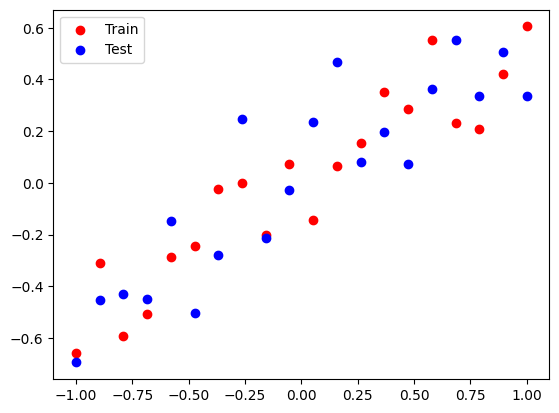

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

 # Regression Model

In [7]:
model1 = Sequential()

model1.add(Dense(128,input_dim=1,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.01)
model1.compile(loss='mse',optimizer=adam,metrics=['mse'])

history = model1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# evaluate the model
_, train_mse = model1.evaluate(X_train,y_train,verbose=0)
_, test_mse = model1.evaluate(X_test,y_test,verbose=0)
print(f'Train: {train_mse}, Test: {test_mse}')

Train: 0.0010202678386121988, Test: 0.04564140364527702


In [9]:
y_pred1 = model1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


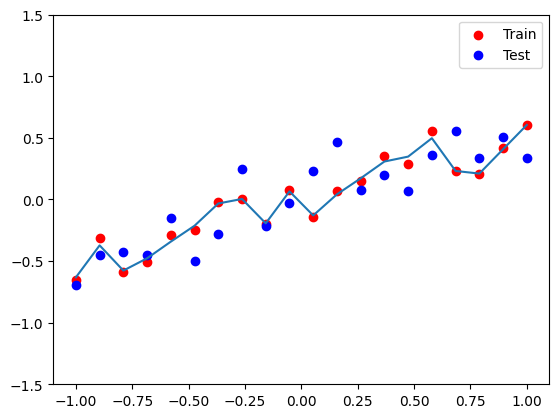

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

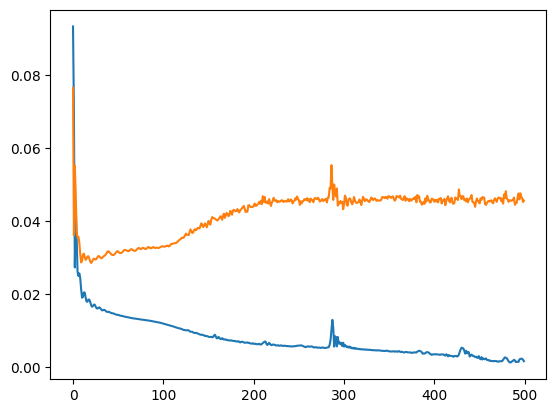

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [12]:
model2 = Sequential()

model2.add(Dense(128,input_dim=1,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.01)

model2.compile(loss='mse',optimizer=adam,metrics=['mse'])

history2 = model2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [13]:
# evaluate_model
# evaluate the model
_, train_mse = model1.evaluate(X_train,y_train,verbose=0)
_, test_mse = model1.evaluate(X_test,y_test,verbose=0)
print(f'Train: {train_mse}, Test: {test_mse}')

Train: 0.0010202678386121988, Test: 0.04564140364527702


In [14]:
y_pred2 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


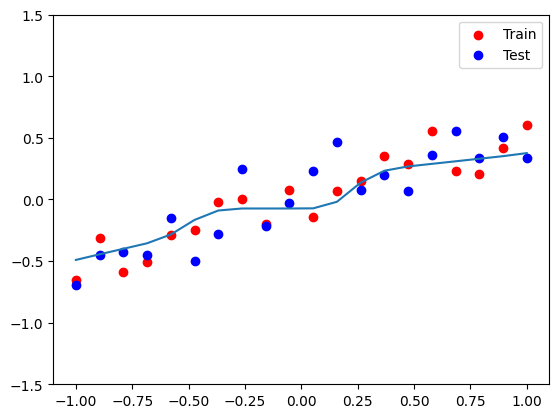

In [15]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

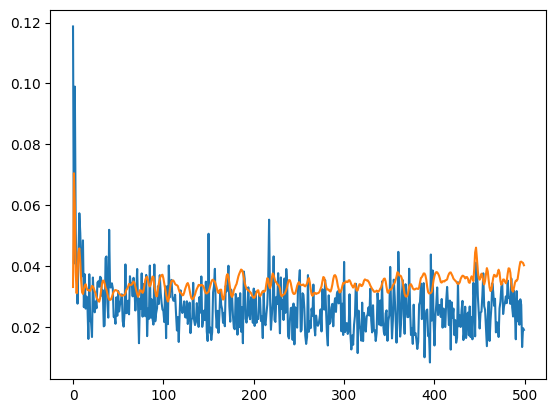

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])